#Import package

In [ ]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt 
from skimage.io import imread, imshow
from tqdm import tqdm
import pandas as pd
import math
import copy
import cv2

In [ ]:
!pip install googleDriveFileDownloader #安裝套件語法 !pip install {套件名稱}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googleDriveFileDownloader import googleDriveFileDownloader
gdownloader = googleDriveFileDownloader()
gdownloader.downloadFile("https://drive.google.com/uc?id=1kwYYWL67O0Dcbx3dvZIfbGg9NiHdyisr&export=download") # 連結到home work 1 data並下載

Download is starting
FILENAME ::: images.zip


0

In [ ]:
!mkdir images
!unzip /content/images.zip -d ./images #解壓縮

串流輸出內容已截斷至最後 5000 行。
  inflating: ./images/images/n02167151/n02167151_15357.JPEG  
  inflating: ./images/images/n02167151/n02167151_1540.JPEG  
  inflating: ./images/images/n02167151/n02167151_15421.JPEG  
  inflating: ./images/images/n02167151/n02167151_15446.JPEG  
  inflating: ./images/images/n02167151/n02167151_1545.JPEG  
  inflating: ./images/images/n02167151/n02167151_15459.JPEG  
  inflating: ./images/images/n02167151/n02167151_15503.JPEG  
  inflating: ./images/images/n02167151/n02167151_15506.JPEG  
  inflating: ./images/images/n02167151/n02167151_15507.JPEG  
  inflating: ./images/images/n02167151/n02167151_15547.JPEG  
  inflating: ./images/images/n02167151/n02167151_15558.JPEG  
  inflating: ./images/images/n02167151/n02167151_15578.JPEG  
  inflating: ./images/images/n02167151/n02167151_15605.JPEG  
  inflating: ./images/images/n02167151/n02167151_1564.JPEG  
  inflating: ./images/images/n02167151/n02167151_15641.JPEG  
  inflating: ./images/images/n02167151/n02167151_156

#Read txt

In [ ]:
train = open("/content/images/train.txt","r")
train_file = train.readlines()
train.close

<function TextIOWrapper.close()>

In [ ]:
test = open("/content/images/test.txt","r")
test_file = test.readlines()
test.close

<function TextIOWrapper.close()>

In [ ]:
val = open("/content/images/val.txt","r")
val_file = val.readlines()
val.close

<function TextIOWrapper.close()>

#Lenet 5
TensorFlow / PyTorch

##Import package

In [ ]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from abc import ABCMeta, abstractmethod

## Data processing

###train

In [ ]:
x_list = []
y_list = []

for l in tqdm(range(len(train_file))):
  (a1,a2) = train_file[l].strip().split()
  filename = cv2.imread(f'/content/images/{a1}',cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(filename,(64,64))
  img = image.reshape(1,64,64)
  x_list.append(img)
  y_list.append(int(a2))

100%|██████████| 63325/63325 [00:41<00:00, 1512.85it/s]


###test

In [ ]:
xtest_list = []
ytest_list = []

for l in tqdm(range(len(test_file))):
  (a1,a2) = test_file[l].strip().split()
  filename = cv2.imread(f'/content/images/{a1}',cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(filename,(64,64))
  img = image.reshape(1,64,64)
  xtest_list.append(img)
  ytest_list.append(int(a2))

100%|██████████| 450/450 [00:00<00:00, 1098.84it/s]


###val

In [ ]:
xval_list = []
yval_list = []

for l in tqdm(range(len(val_file))):
  (a1,a2) = val_file[l].strip().split()
  filename = cv2.imread(f'/content/images/{a1}',cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(filename,(64,64))
  img = image.reshape(1,64,64)
  xval_list.append(img)
  yval_list.append(int(a2))

100%|██████████| 450/450 [00:00<00:00, 971.39it/s]


##Data

In [ ]:
x_train = np.array(x_list).astype("float32")
y_train = np.array(y_list).astype("float32")
X_test = np.array(xtest_list).astype("float32")
Y_test = np.array(ytest_list).astype("float32")
X_val = np.array(xval_list).astype("float32")
Y_val = np.array(yval_list).astype("float32")
x_train, X_test, X_val = x_train/float(255), X_test/float(255), X_val/float(255)
x_train -= np.mean(x_train)
X_test -= np.mean(X_test)
X_val -= np.mean(X_val)

In [ ]:
#隨機排列訓練資料集
n = np.arange(len(x_train))
random.shuffle(n)
X_train = x_train[n]
Y_train = y_train[n]

##Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tfmodel = tf.keras.Sequential([
    tf.keras.layers.MaxPool2D(pool_size=(2,2), input_shape = (64,64,1)),
    tf.keras.layers.Conv2D(6,5,activation='sigmoid',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,5,activation='sigmoid',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='sigmoid'),
    tf.keras.layers.Dense(84,activation='sigmoid'),
    tf.keras.layers.Dense(50,activation='sigmoid')
])


In [ ]:
tfmodel.compile(optimizer = "adam", loss = "CategoricalCrossentropy", metrics = "accuracy")

In [ ]:
tfmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 32, 32, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                        

In [ ]:
train_x = X_train.reshape(63325,64,64,1)
test_x = X_test.reshape(450,64,64,1)
val_x = X_val.reshape(450,64,64,1)

In [ ]:
from re import A
class DataGeneration(keras.utils.Sequence):
  def __init__(self, a, b, batch_size, shuffle=True):
    self.x = a
    self.y = b
    self.batch_size = batch_size

  def __len__(self):
    return int(np.floor(len(self.x) / self.batch_size))

  def __getitem__(self,idx):
    r = np.random.randint(0, len(self.x)-9)
    idxes = np.arange(r,r+10)
    X = self.x[idxes]
    zz = list()
    for id in range(len(idxes)):
      z = np.zeros(50)
      z[int(self.y[idxes[id]])] = 1
      zz.append(z)
    label = np.array(zz)
    return X, label

In [ ]:
history = tfmodel.fit(DataGeneration(train_x,Y_train, 20), epochs=100, validation_data=DataGeneration(test_x,Y_test, 20))


Epoch 1/100
3166/3166 [==============================] - 27s 5ms/step - loss: 3.9193 - accuracy: 0.0203 - val_loss: 3.9299 - val_accuracy: 0.0000e+00
Epoch 2/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9112 - accuracy: 0.0205 - val_loss: 3.9319 - val_accuracy: 0.0273
Epoch 3/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9102 - accuracy: 0.0198 - val_loss: 3.9223 - val_accuracy: 0.0000e+00
Epoch 4/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9106 - accuracy: 0.0205 - val_loss: 3.9060 - val_accuracy: 0.0000e+00
Epoch 5/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9101 - accuracy: 0.0198 - val_loss: 3.9099 - val_accuracy: 0.0000e+00
Epoch 6/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9097 - accuracy: 0.0210 - val_loss: 3.9199 - val_accuracy: 0.0045
Epoch 7/100
3166/3166 [==============================] - 15s 5ms/step - loss: 3.9100 - accuracy: 0.0202 - va

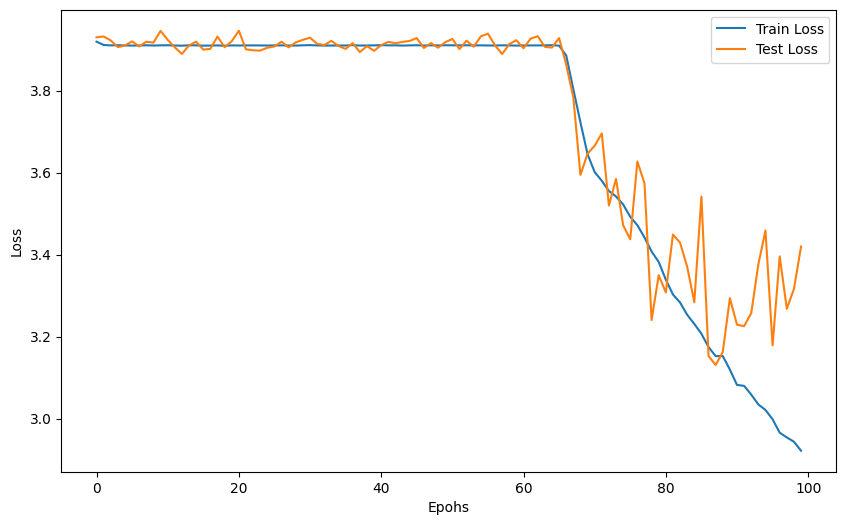

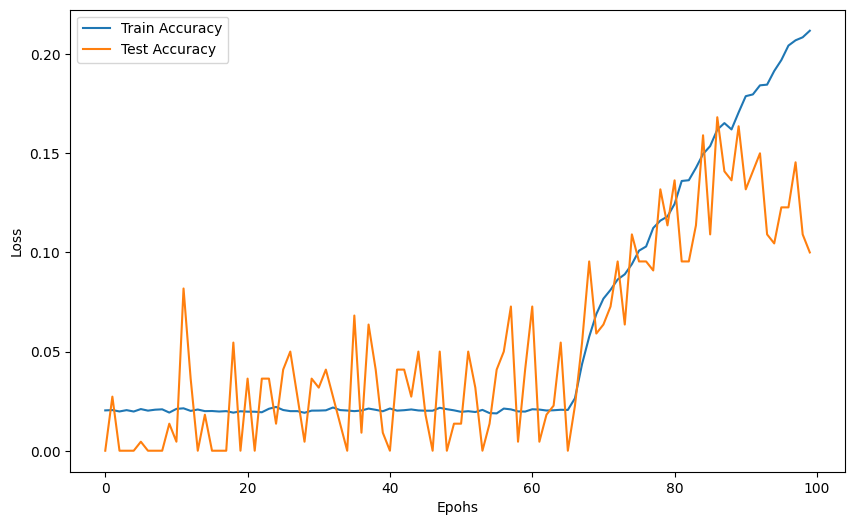

In [ ]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(train_loss,label="Train Loss")
plt.plot(test_loss,label="Test Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.figure(figsize=(10,6))
plt.plot(train_acc,label="Train Accuracy")
plt.plot(test_acc,label="Test Accuracy")
plt.xlabel("Epohs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
history = tfmodel.fit(DataGeneration(train_x,Y_train, 20), epochs=100, validation_data=DataGeneration(val_x,Y_val, 20))

Epoch 1/100
3166/3166 [==============================] - 19s 6ms/step - loss: 2.9031 - accuracy: 0.2160 - val_loss: 3.1551 - val_accuracy: 0.2045
Epoch 2/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8920 - accuracy: 0.2190 - val_loss: 3.3787 - val_accuracy: 0.1591
Epoch 3/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8794 - accuracy: 0.2207 - val_loss: 3.4618 - val_accuracy: 0.2091
Epoch 4/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8490 - accuracy: 0.2312 - val_loss: 3.4399 - val_accuracy: 0.1318
Epoch 5/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8477 - accuracy: 0.2300 - val_loss: 3.4061 - val_accuracy: 0.1773
Epoch 6/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8300 - accuracy: 0.2350 - val_loss: 3.4725 - val_accuracy: 0.1091
Epoch 7/100
3166/3166 [==============================] - 15s 5ms/step - loss: 2.8089 - accuracy: 0.2391 - val_loss: 3.5416 -

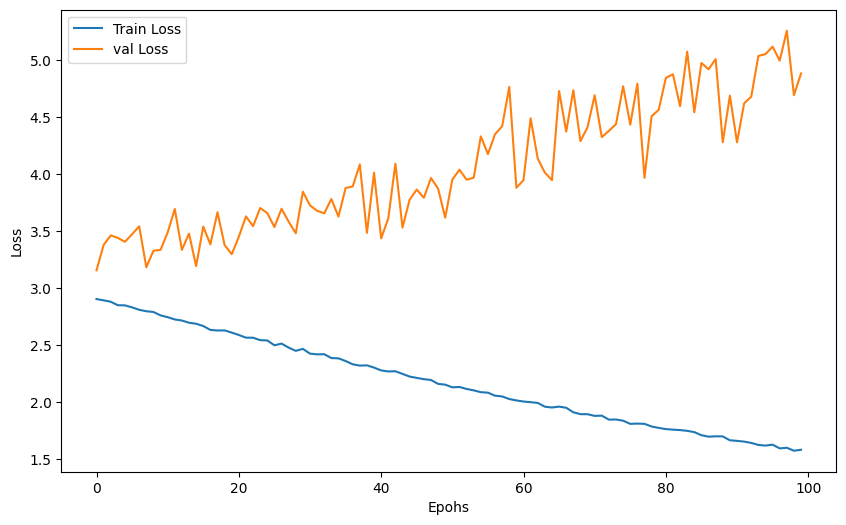

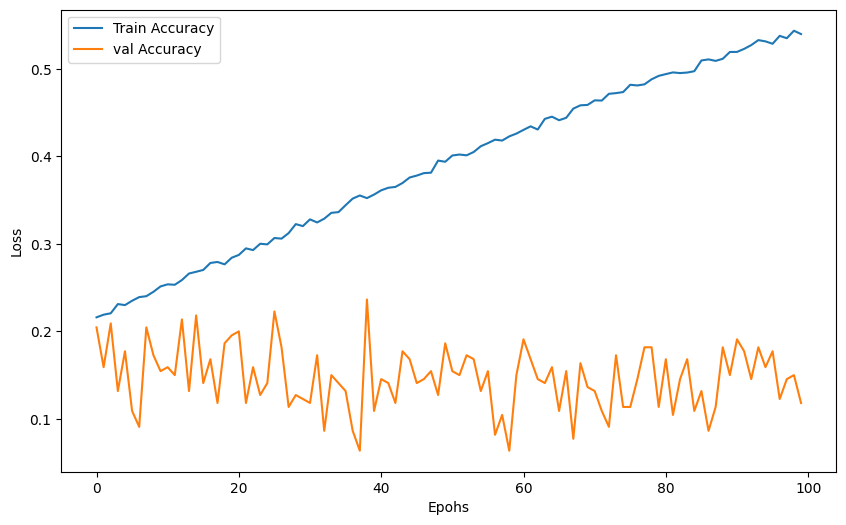

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label="val Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.plot(train_acc,label="Train Accuracy")
plt.plot(val_acc,label="val Accuracy")
plt.xlabel("Epohs")
plt.ylabel("Acc")
plt.legend()
plt.show()

###Static graph vs Dynamic

In [ ]:
import timeit

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.MaxPool2D(pool_size=(2,2), input_shape = (64,64,1)),
    tf.keras.layers.Conv2D(6,5,activation='sigmoid',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,5,activation='sigmoid',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='sigmoid'),
    tf.keras.layers.Dense(84,activation='sigmoid'),
    tf.keras.layers.Dense(50,activation='sigmoid')
])

In [ ]:
tf_model = model

In [ ]:
@tf.function
def model_static(x, y):
  y_pred = tf_model(x)
  loss = tf.losses.MeanSquaredError()(y_pred,y)
  return y_pred, loss

def model_dynamic(x, y):
  y_pred = tf_model(x)
  loss = tf.losses.MeanSquaredError()(y_pred,y)
  return y_pred, loss

In [ ]:
r = np.random.randint(0, len(train_x)-9)
idxes = np.arange(r,r+10)
X = train_x[idxes]
zz = list()
for id in range(len(idxes)):
  z = np.zeros(50)
  z[int(Y_train[idxes[id]])] = 1
  zz.append(z)
label = np.array(zz)

In [ ]:
print("static graph:",timeit.timeit(lambda:model_static(X,label), number = 10))
print("dynamic graph:",timeit.timeit(lambda:model_dynamic(X,label), number = 10))


static graph: 0.8960363800001687
dynamic graph: 0.10670888399999967


In [ ]:
optimizer = tf.optimizers.SGD(1e-4)

losses=[]
for t in range(100):
  with tf.GradientTape() as tape:
    a,loss1 = model_static(X,label)
  gradients = tape.gradient(loss1, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

In [ ]:
correct = 0
total = 0
test = test_x


output = tf_model(test)
for l in tqdm(range(len(test_x))):
  predicted = tf.argmax(output[l])
  total +=1
  if predicted == Y_test[l]:
    correct +=1

print("Test accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:00<00:00, 556.05it/s]


Test accuracy: 9out of450, acc = 2.0%


In [ ]:
optimizer = tf.optimizers.SGD(1e-4)

losses=[]
for t in range(10):
  with tf.GradientTape() as tape:
    a,loss2 = model_dynamic(X,label)
  gradients = tape.gradient(loss2, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

In [ ]:
correct = 0
total = 0
val = val_x


output = tf_model(val)
for l in tqdm(range(len(val_x))):
  predicted = tf.argmax(output[l])
  total +=1
  if predicted == Y_val[l]:
    correct +=1

print("Val accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:01<00:00, 279.99it/s]


Val accuracy: 9out of450, acc = 2.0%


###pruning

In [ ]:
!pip install -q -U tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import tensorflow_model_optimization as tfmot

In [ ]:
from tifffile.tifffile import final
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
batch_size = 20
epochs = 100

num_images = 63325
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

pruning_params = {'pruning_schedules': tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.50,final_sparsity=0.80,begin_step=0,end_step=end_step
)}

model_for_pruning = prune_low_magnitude(tfmodel,**pruning_params)

In [ ]:
model_for_pruning.compile(optimizer='adam',loss = "CategoricalCrossentropy", metrics = "accuracy")

In [ ]:
model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_max_poo  (None, 32, 32, 1)        1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv2d   (None, 32, 32, 6)        308       
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 16, 16, 6)        1         
 ling2d_1 (PruneLowMagnitude                                     
 )                                                               
                                                                 
 prune_low_magnitude_conv2d_  (None, 16, 16, 16)       4818      
 1 (PruneLowMagnitude)                                           
                                                        

In [ ]:
callbacks=[tfmot.sparsity.keras.UpdatePruningStep()]
history = model_for_pruning.fit(DataGeneration(train_x,Y_train, 20), epochs=100, validation_data=DataGeneration(test_x,Y_test, 20), callbacks=callbacks)

Epoch 1/100
3166/3166 [==============================] - 37s 9ms/step - loss: 3.9203 - accuracy: 0.0194 - val_loss: 3.9243 - val_accuracy: 0.0591
Epoch 2/100
3166/3166 [==============================] - 28s 9ms/step - loss: 3.9130 - accuracy: 0.0210 - val_loss: 3.9200 - val_accuracy: 0.0227
Epoch 3/100
3166/3166 [==============================] - 38s 12ms/step - loss: 3.7702 - accuracy: 0.0477 - val_loss: 3.6392 - val_accuracy: 0.0864
Epoch 4/100
3166/3166 [==============================] - 25s 8ms/step - loss: 3.6941 - accuracy: 0.0617 - val_loss: 3.6775 - val_accuracy: 0.0955
Epoch 5/100
3166/3166 [==============================] - 36s 11ms/step - loss: 3.6631 - accuracy: 0.0669 - val_loss: 3.5827 - val_accuracy: 0.1000
Epoch 6/100
3166/3166 [==============================] - 25s 8ms/step - loss: 3.6258 - accuracy: 0.0757 - val_loss: 3.5698 - val_accuracy: 0.1227
Epoch 7/100
3166/3166 [==============================] - 24s 8ms/step - loss: 3.5996 - accuracy: 0.0788 - val_loss: 3.6327

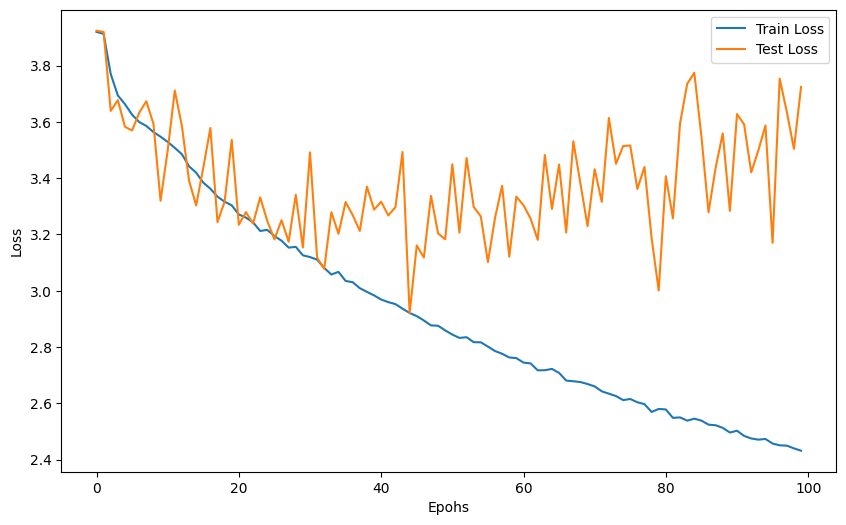

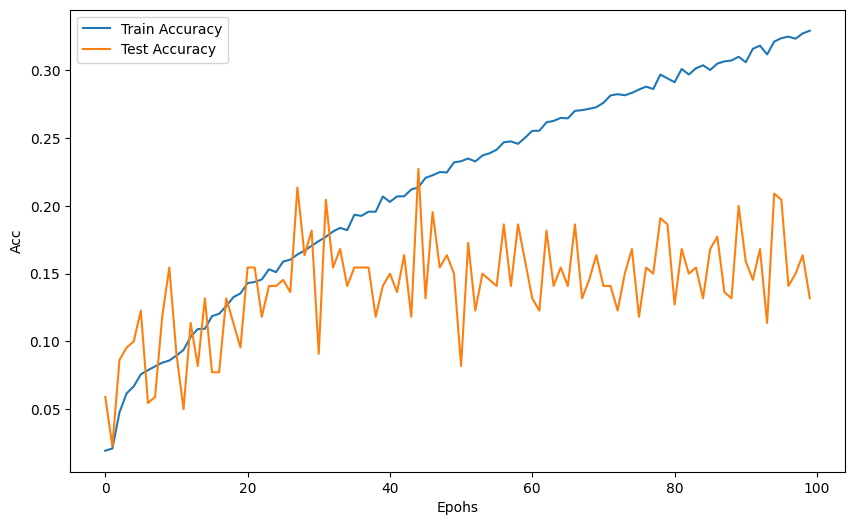

In [ ]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(train_loss,label="Train Loss")
plt.plot(test_loss,label="Test Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.figure(figsize=(10,6))
plt.plot(train_acc,label="Train Accuracy")
plt.plot(test_acc,label="Test Accuracy")
plt.xlabel("Epohs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
callbacks=[tfmot.sparsity.keras.UpdatePruningStep()]
history = model_for_pruning.fit(DataGeneration(train_x,Y_train, 20), epochs=100, validation_data=DataGeneration(val_x,Y_val, 20), callbacks=callbacks)

Epoch 1/100
3166/3166 [==============================] - 24s 8ms/step - loss: 2.4345 - accuracy: 0.3260 - val_loss: 3.8815 - val_accuracy: 0.1273
Epoch 2/100
3166/3166 [==============================] - 25s 8ms/step - loss: 2.4213 - accuracy: 0.3314 - val_loss: 3.8139 - val_accuracy: 0.1182
Epoch 3/100
3166/3166 [==============================] - 25s 8ms/step - loss: 2.4191 - accuracy: 0.3319 - val_loss: 3.9536 - val_accuracy: 0.1364
Epoch 4/100
3166/3166 [==============================] - 23s 7ms/step - loss: 2.3881 - accuracy: 0.3356 - val_loss: 3.8940 - val_accuracy: 0.1091
Epoch 5/100
3166/3166 [==============================] - 24s 8ms/step - loss: 2.4048 - accuracy: 0.3304 - val_loss: 3.6874 - val_accuracy: 0.1591
Epoch 6/100
3166/3166 [==============================] - 24s 8ms/step - loss: 2.3850 - accuracy: 0.3366 - val_loss: 3.8890 - val_accuracy: 0.1000
Epoch 7/100
3166/3166 [==============================] - 24s 7ms/step - loss: 2.3804 - accuracy: 0.3398 - val_loss: 4.0534 -

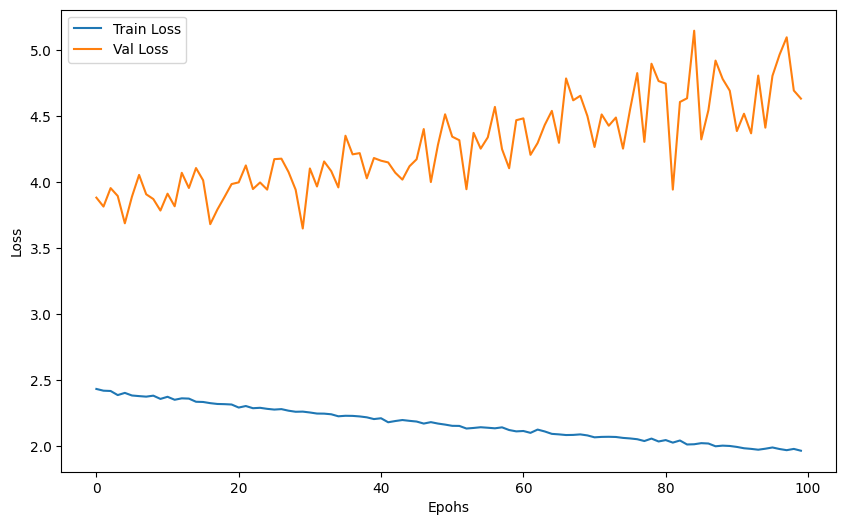

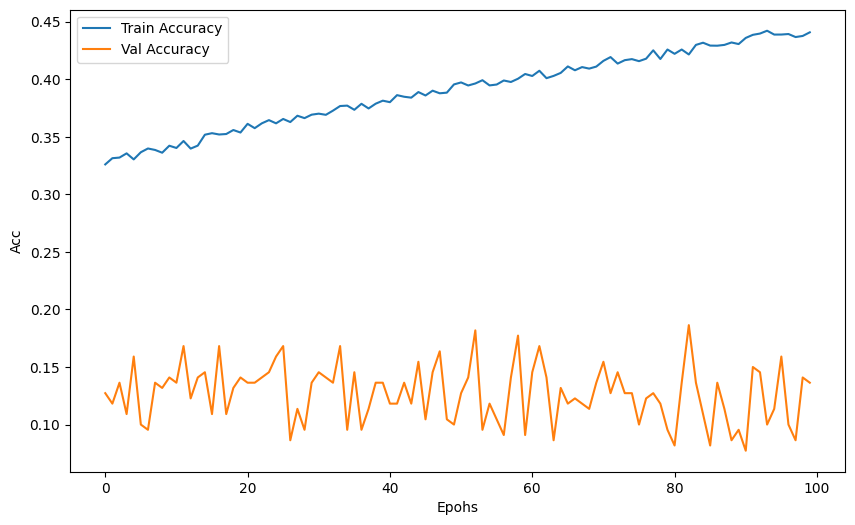

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label="Val Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.figure(figsize=(10,6))
plt.plot(train_acc,label="Train Accuracy")
plt.plot(val_acc,label="Val Accuracy")
plt.xlabel("Epohs")
plt.ylabel("Acc")
plt.legend()
plt.show()

##Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
#Lenet 5
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool = nn.MaxPool2d(2,2)
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.sigm = nn.Sigmoid()
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 50)

  def forward(self, x):
    x = self.pool(x)
    x = self.pool(self.sigm(self.conv1(x)))
    x = self.pool(self.sigm(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.sigm(self.fc1(x))
    x = self.sigm(self.fc2(x))
    x = self.sigm(self.fc3(x))
    return x
model = Net()

In [ ]:
from torch.utils.data.dataset import Dataset

class data(Dataset):
  def __init__(self,a,b):
    self.x = a
    self.y = b

  def __len__(self):
    return(len(self.x))

  def __getitem__(self,idx):
    X = self.x[idx]
    z = np.zeros(50)
    z[int(self.y[idx])] = 1
    label = z
    data = {
        "X": X,
        "Y": label,
    }
    return X, label

In [ ]:
#Loss function
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.000001, momentum=0.9) 

###Train

In [ ]:
dataset = data(X_train,Y_train)
loader = DataLoader(dataset=dataset, batch_size=20)
train_loss = []

epoh = 100
for i in tqdm(range(epoh)):
  for x_batch,y_batch in loader:


    outputs = model(x_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  train_loss.append(loss)
  if i % 10 == 0:
    print("%s%% iter: %s, loss: %s" % (100*i/epoh,i, loss))


  1%|          | 1/100 [00:21<35:10, 21.31s/it]

0.0% iter: 0, loss: tensor(3.9233, dtype=torch.float64, grad_fn=<DivBackward1>)


 11%|█         | 11/100 [03:47<30:38, 20.66s/it]

10.0% iter: 10, loss: tensor(3.9234, dtype=torch.float64, grad_fn=<DivBackward1>)


 21%|██        | 21/100 [07:13<27:10, 20.64s/it]

20.0% iter: 20, loss: tensor(3.9235, dtype=torch.float64, grad_fn=<DivBackward1>)


 31%|███       | 31/100 [10:39<23:38, 20.55s/it]

30.0% iter: 30, loss: tensor(3.9236, dtype=torch.float64, grad_fn=<DivBackward1>)


 41%|████      | 41/100 [14:06<20:04, 20.41s/it]

40.0% iter: 40, loss: tensor(3.9237, dtype=torch.float64, grad_fn=<DivBackward1>)


 51%|█████     | 51/100 [17:32<16:42, 20.45s/it]

50.0% iter: 50, loss: tensor(3.9239, dtype=torch.float64, grad_fn=<DivBackward1>)


 61%|██████    | 61/100 [20:59<13:38, 21.00s/it]

60.0% iter: 60, loss: tensor(3.9240, dtype=torch.float64, grad_fn=<DivBackward1>)


 71%|███████   | 71/100 [24:23<09:43, 20.13s/it]

70.0% iter: 70, loss: tensor(3.9241, dtype=torch.float64, grad_fn=<DivBackward1>)


 81%|████████  | 81/100 [27:46<06:22, 20.13s/it]

80.0% iter: 80, loss: tensor(3.9242, dtype=torch.float64, grad_fn=<DivBackward1>)


 91%|█████████ | 91/100 [31:09<03:02, 20.26s/it]

90.0% iter: 90, loss: tensor(3.9243, dtype=torch.float64, grad_fn=<DivBackward1>)


100%|██████████| 100/100 [34:10<00:00, 20.50s/it]


In [ ]:
loss = []
for l in range(len(train_loss)):
  loss.append(train_loss[l].detach().numpy())


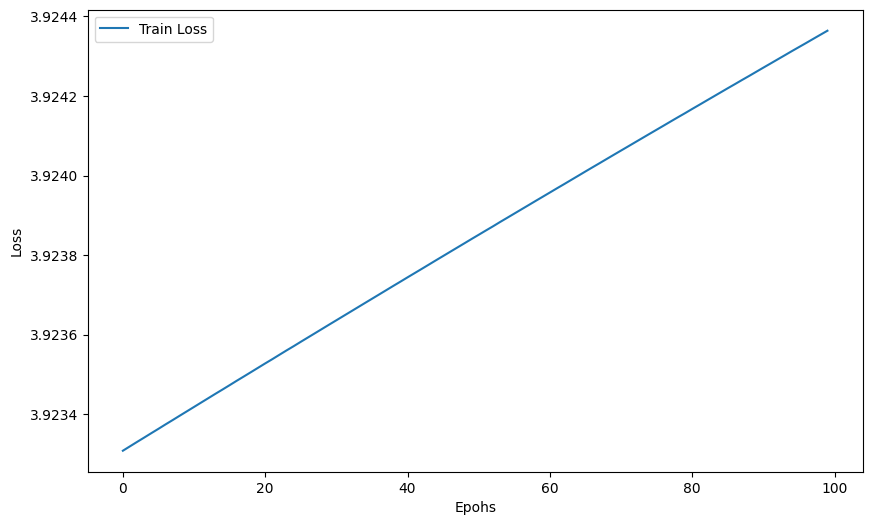

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(loss,label="Train Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()

###Test

In [ ]:
correct = 0
total = 0
test = torch.from_numpy(X_test)

with torch.no_grad():
  for l in tqdm(range(len(X_test))):
    output = model(test)
    _, predicted = torch.max(output, 1)
    total +=1
    if predicted[l] == Y_test[l]:
      correct +=1

print("Test accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:21<00:00, 20.47it/s]

Test accuracy: 9out of450, acc = 2.0%


###Val

In [ ]:
correct = 0
total = 0
val = torch.from_numpy(X_val)

with torch.no_grad():
  for l in tqdm(range(len(X_val))):
    output = model(val)
    _, predicted = torch.max(output, 1)
    total +=1
    if predicted[l] == Y_val[l]:
      correct +=1

print("val accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:21<00:00, 20.50it/s]

val accuracy: 9out of450, acc = 2.0%


###Pruning

In [ ]:
import torch.nn.utils.prune as prune

In [ ]:
model1 = Net()

parameters_to_prune = (
    (model1.conv1,'weight'),
    (model1.conv2,'weight'),
    (model1.fc1,'weight'),
    (model1.fc2,'weight'),
    (model1.fc3,'weight'),
)

prune.global_unstructured(parameters_to_prune,pruning_method=prune.L1Unstructured,amount=0.2)

####Train

In [ ]:
dataset = data(X_train,Y_train)
loader = DataLoader(dataset=dataset, batch_size=20)
train_loss = []

epoh = 100
for i in tqdm(range(epoh)):
  for x_batch,y_batch in loader:


    outputs = model1(x_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  train_loss.append(loss)
  if i % 10 == 0:
    print("%s%% iter: %s, loss: %s" % (100*i/epoh,i, loss))

  1%|          | 1/100 [00:20<34:20, 20.82s/it]

0.0% iter: 0, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 11%|█         | 11/100 [03:41<29:42, 20.03s/it]

10.0% iter: 10, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 21%|██        | 21/100 [06:54<25:33, 19.41s/it]

20.0% iter: 20, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 31%|███       | 31/100 [10:06<22:13, 19.33s/it]

30.0% iter: 30, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 41%|████      | 41/100 [13:17<18:48, 19.13s/it]

40.0% iter: 40, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 51%|█████     | 51/100 [16:27<15:42, 19.24s/it]

50.0% iter: 50, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 61%|██████    | 61/100 [19:38<12:23, 19.05s/it]

60.0% iter: 60, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 71%|███████   | 71/100 [22:49<09:18, 19.25s/it]

70.0% iter: 70, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 81%|████████  | 81/100 [25:59<06:01, 19.04s/it]

80.0% iter: 80, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


 91%|█████████ | 91/100 [29:10<02:52, 19.17s/it]

90.0% iter: 90, loss: tensor(3.9210, dtype=torch.float64, grad_fn=<DivBackward1>)


100%|██████████| 100/100 [32:01<00:00, 19.22s/it]


In [ ]:
loss = []
for l in range(len(train_loss)):
  loss.append(train_loss[l].detach().numpy())

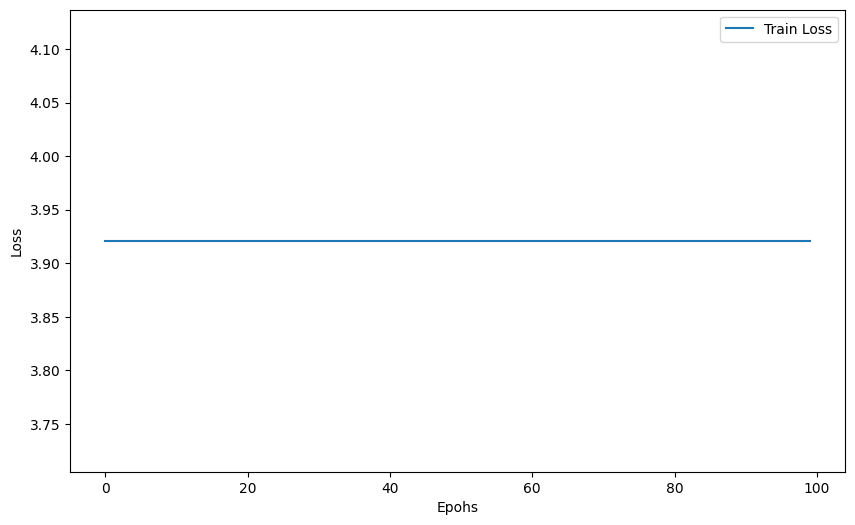

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(loss,label="Train Loss")
plt.xlabel("Epohs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####Test

In [ ]:
correct = 0
total = 0
test = torch.from_numpy(X_test)

with torch.no_grad():
  for l in tqdm(range(len(X_test))):
    output = model1(test)
    _, predicted = torch.max(output, 1)
    total +=1
    if predicted[l] == Y_test[l]:
      correct +=1

print("Test accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:20<00:00, 22.00it/s]

Test accuracy: 9out of450, acc = 2.0%


####Val

In [ ]:
correct = 0
total = 0
val = torch.from_numpy(X_val)

with torch.no_grad():
  for l in tqdm(range(len(X_val))):
    output = model1(val)
    _, predicted = torch.max(output, 1)
    total +=1
    if predicted[l] == Y_val[l]:
      correct +=1

print("Val accuracy: " + str(correct) + "out of" + str(total) + ", acc = " + str(100*correct/total) + "%")

100%|██████████| 450/450 [00:21<00:00, 21.19it/s]

Val accuracy: 9out of450, acc = 2.0%
